In [42]:
#Loading updated stats
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import math 

team = pd.read_csv('teamstats_updated.csv') 

In [26]:
team

,Index,Player,AVG,OPS,GP-GS,AB,R,H,2B,3B,...,TB,SLG%,BB,HBP,SO,GDP,OB%,SF,SH,SB-ATT
0,12,"Ostberg, Ian",0.365,1.015,14-13,52,7,19,7,0,...,32,0.615,5,0,13,0,0.400,3,1,2-3
1,5,"Zimbardo, Jared",0.333,0.884,25-23,90,16,30,7,1,...,42,0.467,9,4,25,0,0.417,0,2,5-9
2,44,"McDermott, Andrew",0.314,0.998,16-11,35,10,11,2,0,...,19,0.543,7,2,14,0,0.455,0,0,1-1
3,17,"Melnick, Danny",0.308,0.971,23-23,91,22,28,9,0,...,52,0.571,12,2,23,2,0.400,0,0,2-2
4,3,"O'Connor, Keegan",0.299,0.769,29-28,107,15,32,8,0,...,43,0.402,4,8,41,0,0.367,1,0,3-4
5,1,"Maves, Kyle",0.296,0.823,28-28,108,27,32,7,3,...,45,0.417,21,1,28,2,0.406,3,2,12-16
6,24,"DeRosa, Matt",0.288,0.667,19-16,59,6,17,4,0,...,21,0.356,2,0,11,3,0.311,0,1,0-1
7,26,"Donofrio, Anthony",0.280,0.734,25-22,93,16,26,4,1,...,35,0.376,10,2,16,1,0.358,1,0,9-11
8,16,"Thomas, Zak",0.273,0.793,3-Apr,11,3,3,1,0,...,4,0.364,2,1,7,0,0.429,0,1,0-0
9,38,"Kohn, Michael",0.266,0.860,26-20,79,15,21,3,0,...,39,0.494,11,2,27,0,0.366,1,1,1-1


C:\Users\Micahl DeRosa\AppData\Local\Temp\ipykernel_24116\3308166251.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  model_1.set_xticklabels(team['Player'], rotation=90 )


-2.8235294117647065

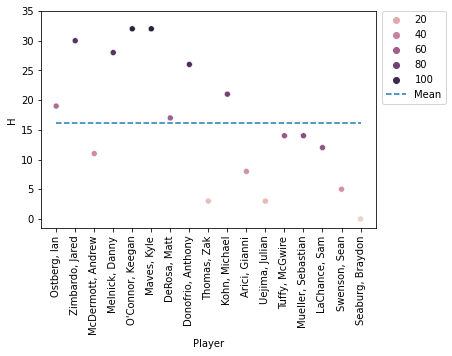

In [41]:
#calculating mean of hits
y_mean = team['H'].mean()


#Making a scatter plot to show H(Hits)
model_1 = sb.scatterplot(data=team, x = "Player", y ='H', hue='AB')

#ploting mean a line
mean_line = sb.lineplot(x='Player', y=y_mean, data=team, label='Mean', linestyle='--')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
model_1.set_xticklabels(team['Player'], rotation=90 )
model_1.set_yticks(range(0,40,5))

#distance for point 1 
distance = (y_mean - team.loc[0].at['H'])
(distance)
#distance_line = sb.lineplot(x=distance, y='H', data=team, linestyle='--')


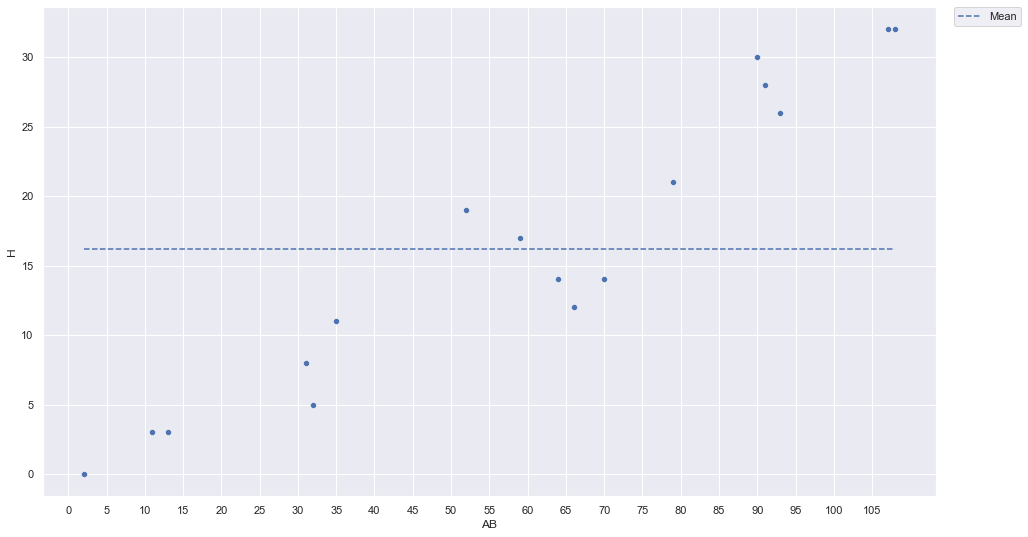

In [44]:
model_2 = sb.scatterplot(data=team, x = "AB", y ='H')

#ploting mean a line
mean_line = sb.lineplot(x='AB', y=y_mean, data=team, label='Mean', linestyle='--')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

model_2.set_xticks(range(0,110,5))
sb.set(rc = {'figure.figsize':(16,9)})


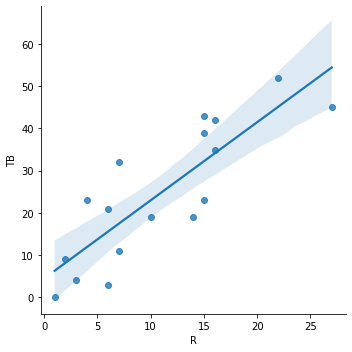

In [23]:
team_GP = team.sort_values(by='AB', ascending=False)
ops = team_GP[['Player', 'OPS']]

totalbags = team_GP[['Player', 'AB', 'TB']]

runs = team_GP[['Player', 'AB', 'R']]


sb.lmplot(x='R', y='TB', data=team)


In [51]:
#total base percentage
derosa_H = team.loc[6].at['H']
derosa_BB = team.loc[6].at['BB']
derosa_HBP = team.loc[6].at['HBP']
derosa_AB = team.loc[6].at['AB']
derosa_SO = team.loc[6].at['SO']

TBP = (derosa_H + derosa_BB + derosa_HBP) / (derosa_AB + derosa_BB + derosa_HBP)
round(TBP,3)

0.311

In [52]:
#strikeout ratio 
SO = derosa_SO / derosa_AB
round(SO, 3)


0.186

In [53]:
#total base percentage
tuffy_H = team.loc[12].at['H']
tuffy_BB = team.loc[12].at['BB']
tuffy_HBP = team.loc[12].at['HBP']
tuffy_AB = team.loc[12].at['AB']
tuffy_SO = team.loc[12].at['SO']

TBP1 = (tuffy_H + tuffy_BB + tuffy_HBP) / (tuffy_AB + tuffy_BB + tuffy_HBP)
round(TBP1,3)

0.367

In [54]:
SO1 = tuffy_SO / tuffy_AB
round(SO1, 3)

0.281

In [59]:
SO_data = [['Tuffy', SO1], ['Matt', SO]]
SO_df = pd.DataFrame(SO_data, columns=['Players', 'SO Rate'])
SO_df

,Players,SO Rate
0,Tuffy,0.281250
1,Matt,0.186441
